In [37]:
# Importing necessary dependencies
DRAFT = True
import itertools
import logging
import warnings
import numpy as np
print(np.version.version)
#warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.filterwarnings("ignore", "plotnine\..*")

import cmdstanpy as csp
csp.utils.get_logger().setLevel(logging.ERROR)


import statistics as stat
import pandas as pd
import plotnine as pn
import patchworklib as pw


# This works with printing instead of drawing: https://lightrun.com/answers/spyder-ide-spyder-plotnine-plots-not-showing-up
def mydraw(x):
    """draw plot in the quarto doc"""
    x.print()

1.23.1


In [20]:
f = open('binomial-rng.stan', 'w')
f.write("""

data {
    int<lower=0> N;
    real<lower=0, upper=1> theta;
}
generated quantities{
    int<lower=0, upper=N> y = binomial_rng(N, theta);
}

""")
f.close()

In [21]:
# Drawing 10 samples from the first model
N = 100
theta = 0.3
data = {'N': N, 'theta': theta}
model = csp.CmdStanModel(stan_file = 'binomial-rng.stan')
sample = model.sample(data = data, seed = 123, chains = 1, 
                      iter_sampling = 10, iter_warmup = 0, 
                      show_progress = True, show_console = True)

Chain [1] method = sample (Default)
Chain [1] sample
Chain [1] num_samples = 10
Chain [1] num_warmup = 0
Chain [1] save_warmup = 0 (Default)
Chain [1] thin = 1 (Default)
Chain [1] adapt
Chain [1] engaged = 1 (Default)
Chain [1] gamma = 0.050000000000000003 (Default)
Chain [1] delta = 0.80000000000000004 (Default)
Chain [1] kappa = 0.75 (Default)
Chain [1] t0 = 10 (Default)
Chain [1] init_buffer = 75 (Default)
Chain [1] term_buffer = 50 (Default)
Chain [1] window = 25 (Default)
Chain [1] algorithm = hmc (Default)
Chain [1] hmc
Chain [1] engine = nuts (Default)
Chain [1] nuts
Chain [1] max_depth = 10 (Default)
Chain [1] metric = diag_e (Default)
Chain [1] metric_file =  (Default)
Chain [1] stepsize = 1 (Default)
Chain [1] stepsize_jitter = 0 (Default)
Chain [1] num_chains = 1 (Default)
Chain [1] id = 1 (Default)
Chain [1] data
Chain [1] file = C:\Users\manny\AppData\Local\Temp\tmp2um06olm\zwo8qigx.json
Chain [1] init = 2 (Default)
Chain [1] random
Chain [1] seed = 123
Chain [1] output
Ch

In [24]:
# Number of clinical trial successes with 10 samples consisting of 100 patients and a 30% probability of success
y = sample.stan_variable('y')
print("N = ", N, "; theta = ", theta, "; y(0:10) = ", *y.astype(int))

N =  100 ; theta =  0.3 ; y(0:10) =  33 36 30 28 37 26 25 19 29 33


In [25]:
# Running a looped version of the above scenario
for N in [10, 100, 1_000, 10_000]:
    data = {'N': N, 'theta': theta}
    sample = model.sample(data = data, seed = 123, chains = 1,
                          iter_sampling = 10, iter_warmup = 0,
                          show_progress = False,
              show_console = False)
    y = sample.stan_variable('y')
    print("N =", N)
    print("  y: ", *y.astype(int))
    print("  est. theta: ", *(y / N))

N = 10
  y:  4 4 3 4 3 3 3 5 2 4
  est. theta:  0.4 0.4 0.3 0.4 0.3 0.3 0.3 0.5 0.2 0.4
N = 100
  y:  33 36 30 28 37 26 25 19 29 33
  est. theta:  0.33 0.36 0.3 0.28 0.37 0.26 0.25 0.19 0.29 0.33
N = 1000
  y:  322 324 306 333 311 318 294 323 282 311
  est. theta:  0.322 0.324 0.306 0.333 0.311 0.318 0.294 0.323 0.282 0.311
N = 10000
  y:  3049 3052 3012 3025 3042 3087 3051 2922 2943 3025
  est. theta:  0.3049 0.3052 0.3012 0.3025 0.3042 0.3087 0.3051 0.2922 0.2943 0.3025


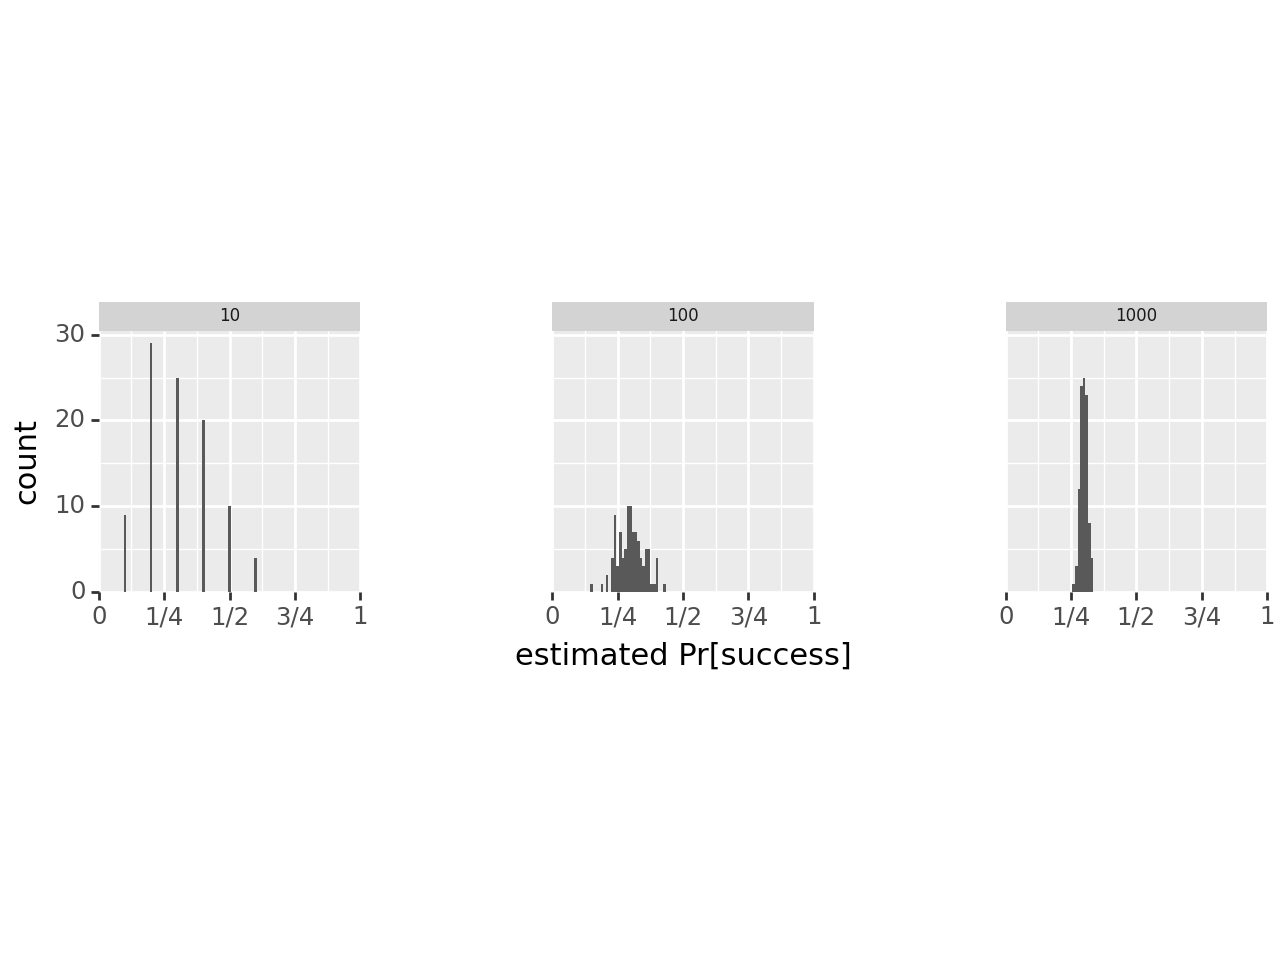

In [40]:
np.random.seed(123)
ts = []
ps = []
theta = 0.3
M = 100 if DRAFT else 100000
for N in [10, 100, 1000]:
    data = {'N': N, 'theta': theta}
    sample = model.sample(data = data, seed = 123, chains = 1, iter_sampling = M, iter_warmup = 0, 
                          show_progress = False, show_console = False)
    y = sample.stan_variable('y')
    theta_hat = y/N
    ps.extend(theta_hat)
    ts.extend(itertools.repeat(N, M))
xlabel = 'estimated Pr[success]'
df = pd.DataFrame({xlabel: ps, 'trials': ts})

# I used print here instead of draw? Interesting
print(pn.ggplot(df, pn.aes(x = xlabel))
       + pn.geom_histogram(binwidth = 0.01)
       + pn.facet_grid('. ~ trials')
       + pn.scales.scale_x_continuous(limits = [0,1], breaks = [0, 1/4, 1/2, 3/4, 1],
                                     labels = ["0", "1/4", "1/2", "3/4", "1"], expand = [0, 0])
       + pn.scales.scale_y_continuous(expand = [0, 0, 0.05, 0])
       + pn.theme(aspect_ratio = 1, panel_spacing = 0.15,
                 strip_text = pn.element_text(size = 6),
                 strip_background = pn.element_rect(height = 0.08,
                                                   fill = "lightgray")))

In [1]:
from cmdstanpy import cmdstan_path
print(cmdstan_path())

C:\Users\manny\anaconda3\envs\stan\Library\bin\cmdstan


In [6]:
import cmdstanpy
cmdstanpy.__version__

'1.1.0'

In [13]:
from cmdstanpy import cmdstan_path, set_cmdstan_path
cmdstan_path()

'C:\\Users\\manny\\.cmdstan\\cmdstan-2.32.2'

In [11]:
import tbb
tbb.__version__

ModuleNotFoundError: No module named 'tbb'

In [17]:
import cmdstanpy
cmdstanpy.install_cmdstan(compiler=True, overwrite = True)
set_cmdstan_path(r"C:\Users\manny\.cmdstan")
cmdstan_path()

Installing CmdStan version: 2.32.2
Install directory: C:\Users\manny\.cmdstan
Download successful, file: C:\Users\manny\AppData\Local\Temp\tmpq4_owhe_
Extracting distribution
Unpacked download as cmdstan-2.32.2
Building version cmdstan-2.32.2, may take several minutes, depending on your system.
Overwrite requested, remove existing build of version cmdstan-2.32.2
Rebuilding version cmdstan-2.32.2
Test model compilation
Installed cmdstan-2.32.2


ValueError: CmdStan installataion missing binaries in C:\Users\manny\.cmdstan/bin. Re-install cmdstan by running command "install_cmdstan --overwrite", or Python code "import cmdstanpy; cmdstanpy.install_cmdstan(overwrite=True)"

In [18]:
cmdstan_path()

'C:\\Users\\manny\\.cmdstan\\cmdstan-2.32.2'